In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
from pycochleagram.utils import wav_to_array
from pycochleagram.cochleagram import human_cochleagram

from tqdm import tqdm

In [5]:
class AudioAnalyzer:

    def __init__(self, wave_file, mat_file, annotation_file):

        self.wave, self.sample_rate = wav_to_array(wave_file)
        self.wave = self.wave[:,0]
        self.features = scipy.io.loadmat(mat_file)['sfs']
        self.annotations = pd.read_csv(annotation_file, sep=' ', names=['Time', 'Material', 'Contact Type', 'Motion Type'])

        self.isolatePeaks()


    def vizWaveform(self):
        plt.gcf().set_figwidth(20)
        plt.plot(range(len(self.wave)), self.wave)

        for row in self.annotations.iterrows():
            frame = row[1]['Time'] * self.sample_rate
            plt.plot([frame, frame], [-1, 1], 'k:' if row[1]['Material'] !='None' else 'r:')

        plt.show()

    def isolatePeaks(self, windowDuration=0.5):

        self.peaks = []
        for row in self.annotations.iterrows():
            peak_time = row[1]['Time']
            start_time = peak_time - windowDuration/2
            end_time = peak_time + windowDuration/2

            start_frame = int(start_time * self.sample_rate)
            end_frame = int(end_time * self.sample_rate)
            self.peaks.append(self.wave[start_frame:end_frame])

    def buildCochleagrams(self):

        cochs = []
        for peak in tqdm(self.peaks):
            coch = human_cochleagram(peak, self.sample_rate, n=40, low_lim=100, hi_lim=10000, sample_factor=1, downsample=90, nonlinearity='power')
            cochs.append(coch)
        return cochs

    def getDuration(self):
        return len(self.wave)/self.sample_rate


In [ ]:
aa = AudioAnalyzer('../data/vis-data-256/2015-02-16-16-49-06_mic.wav', '../data/vis-data/2015-02-16-16-49-06_sf.mat', '../data/vis-data-256/2015-02-16-16-49-06_times.txt')

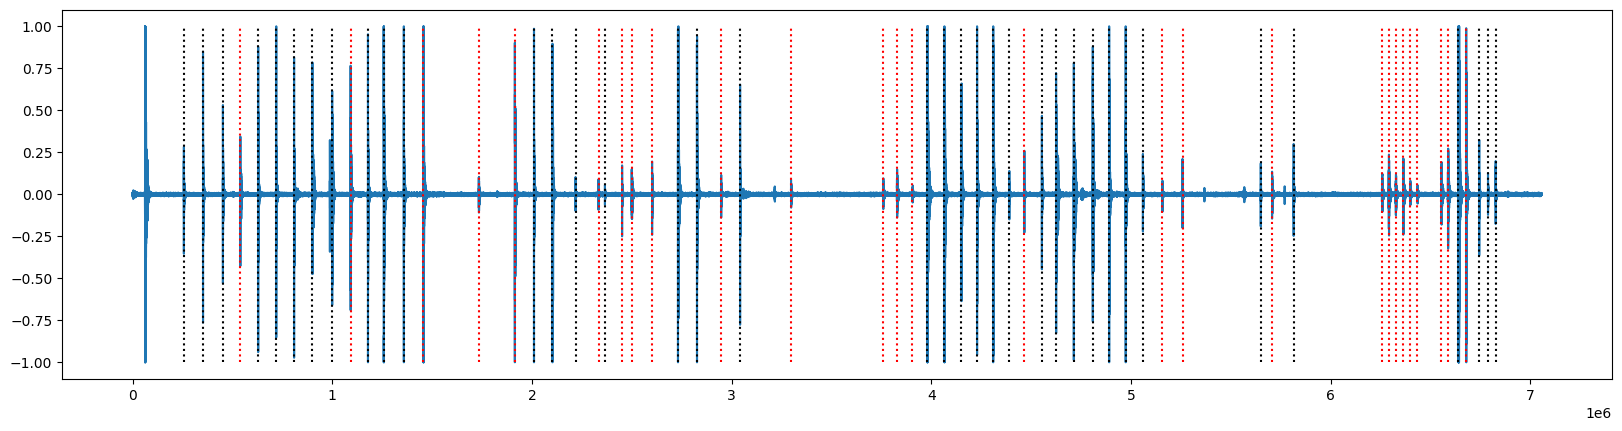

In [19]:
aa.vizWaveform()

In [20]:
cochs = aa.buildCochleagrams()

  0%|          | 0/64 [00:00<?, ?it/s]/home2/dhruv.kapur/anaconda3/envs/torch/lib/python3.9/site-packages/pycochleagram-0.1-py3.9.egg/pycochleagram/cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)
100%|██████████| 64/64 [00:12<00:00,  5.25it/s]


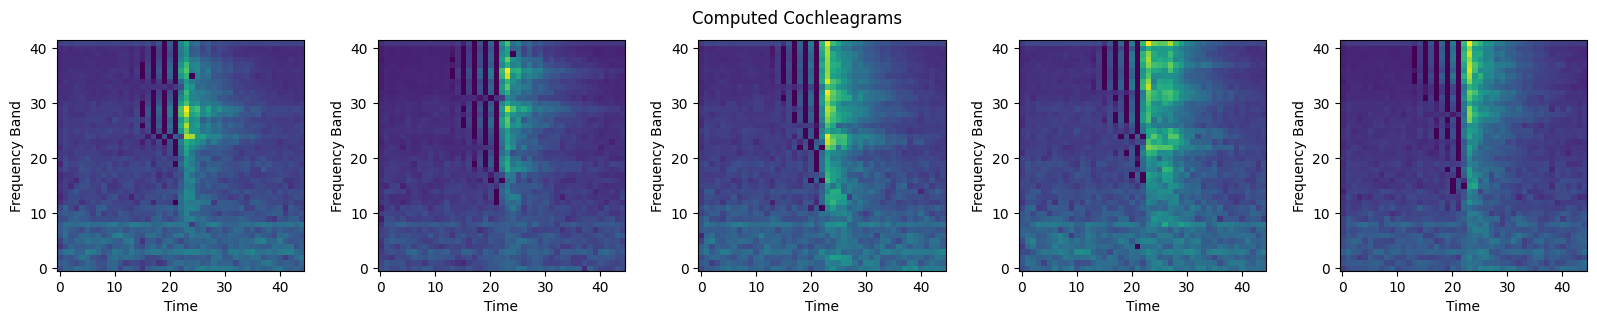

In [21]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 3))

fig.suptitle("Computed Cochleagrams")

for coch, ax in zip(cochs[:5], axs):
    ax.imshow(coch, origin='lower')
    ax.set_xlabel("Time")
    ax.set_ylabel("Frequency Band")
plt.show()

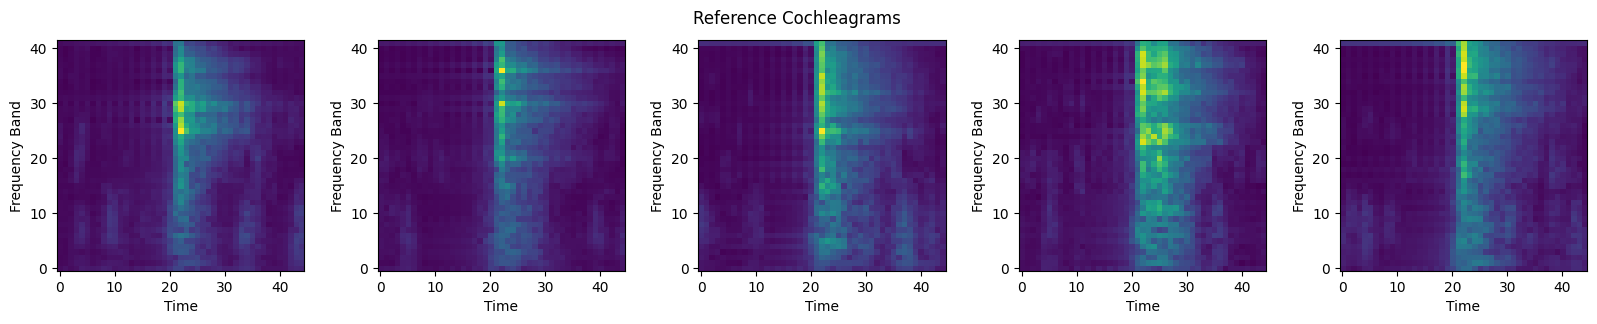

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 3))

fig.suptitle("Reference Cochleagrams")

for coch, ax in zip(aa.features[:5], axs):
    ax.imshow(coch.T, origin='lower')
    ax.set_xlabel("Time")
    ax.set_ylabel("Frequency Band")
plt.show()